## Synopsis
In this project, you will learn to use opencv to perform feature detectors in an image and find the best matching features in other images.  

<img src="https://vision.cornell.edu/se3/wp-content/uploads/2017/05/homography-705x1141.png" width="300"> 

Next, you will apply your matching results to align images to generate __infinite zoom__ visual effect. Some examples: 

<img src="https://videolancer.net//wp-content/uploads/2018/03/simple-1.gif" width="300"> 
<img src="https://videolancer.net//wp-content/uploads/2018/03/optics-2.gif" width="300">  


### Scores 
1. (5%)Take a sequence of moving-forward images in NTHU campus.
2. (5%)Show feature extraction and matching results between two images 
3. (10%)Perform image alignment and generate infinite zooming effect 
4. (20%)implement different feature extrators, e.g. SIFT, SURF, and compare the results 
5. (10%)exploit creativity to add some image processing to enhance effect. You can use photoshop to do some effects, such as bluring or coloring.   
6. (30%) Assistant score
7. (20%)Mutual evaluation


### Feature Extraction 
Your features should be reasonably invariant to translation, rotation, illumination, and scale, and you'll evaluate their performance on a suite of benchmark images.  We'll rank the performance of features that students in the class come up with, and compare them with the current state-of-the-art.


## Environment Setup for OpenCV 
To help you visualize the results and debug your program, we provide a working user interface that displays detected features and best matches in other images.  We also provide sample feature files that were generated using ORB, the current best of breed technique in the vision community, for comparison.


## Reference 
* Image registration and transformation <br>
https://colab.research.google.com/drive/1BwdSConGugBlGzPLLkXHTz2ahkdzEhQ9 
http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_geometric.html


* Image alignment <br>
https://www.learnopencv.com/image-alignment-feature-based-using-opencv-c-python/
https://github.com/michal2229/image-align-and-average
https://www.pyimagesearch.com/2016/01/11/opencv-panorama-stitching/ # 新段落

## Previous work
https://www.youtube.com/watch?v=DcaAHDKjabo

https://www.youtube.com/watch?v=5zQ_RnVvjxI

https://www.youtube.com/watch?v=oNsYRzeGDh8

https://www.youtube.com/watch?time_continue=2&v=nz92suXBC_M

https://www.youtube.com/watch?v=dqGhWbuSOpc




In [1]:
# Import package for feature matching 
# Connect to Google Drive from youtself
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [31]:
# Ensure the image is exists
!ls "."

0.JPG	     1try   4.JPG	 align12.JPG		  mod.jpg
0match1.jpg  2.JPG  align01.JPG  Copy_of_homework4.ipynb  orig.jpg
1.JPG	     3.JPG  align02.JPG  high


In [74]:
# Read image
img1name = './0.JPG'
img2name = './3.JPG'
aligname = './align03.JPG'

img1 = cv2.imread(img1name,0)          # queryImage
img2 = cv2.imread(img2name,0)           # trainImage

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

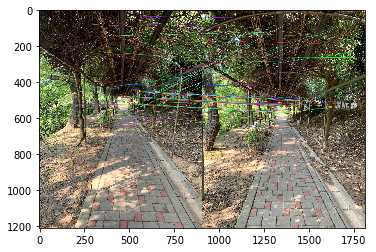

True

In [79]:
img1 = cv2.imread(img1name)          # queryImage
img2 = cv2.imread(img2name)           # trainImage

img1 = img1[...,::-1]
img2 = img2[...,::-1]

gmatches = matches[:75]

img3 = cv2.drawMatches(img1,kp1,img2,kp2,gmatches,None, flags=2)
plt.imshow(img3),plt.show()
img3 = img3[...,::-1]
cv2.imwrite('./match03.jpg',img3)



In [76]:
#DO aligned

# Extract location of good matches
points1 = np.zeros((len(gmatches), 2), dtype=np.float32)
points2 = np.zeros((len(gmatches), 2), dtype=np.float32)

for i, match in enumerate(gmatches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

# Use homography
height, width, channels = img2.shape
im1Reg = cv2.warpPerspective(img1, h, (width, height))

plt.imshow(im1Reg),plt.show()
im1Reg = im1Reg[...,::-1]
cv2.imwrite(aligname,im1Reg)

True

In [2]:
#different feature extrators, e.g. SIFT, SURF
#SIFT
img = cv2.imread('0.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT()
kp, des = sift.detectAndCompute(gray,None)
siftimg = cv2.drawKeypoints(gray,kp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite('./sift0.jpg',siftimg)

AttributeError: module 'cv2.cv2' has no attribute 'SIFT'

/home/cgv-yu/Desktop/cvfx/homework4/hw4/bin/python3
